In [7]:
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
import sys
import importlib
from astropy.cosmology import FlatLambdaCDM
import pandas as pd

from utils_orbs.orb_paths import SetupPaths
import utils_orbs.readsubfHDF5Py3 as readSub
# from utils.read_group_cats import ReadCats
from utils_orbs.merger_trees import TraceMergerTree
from utils_orbs.readMergerHistoryFiles import FindHistory
from utils_orbs.vectorCorrection import vectorCorrection as vector

paths = SetupPaths()

In [8]:
plt.show();
plt.rcParams.update({'font.size':16,"xtick.direction":"in","ytick.direction":"in", 
                     "xtick.top":True, "ytick.right":True,"text.usetex":False,
                     "xtick.labelsize":18,"ytick.labelsize":18})

# Definitions for this notebook:

z_directory {"33":"z=2","40":"z=1.5","50":"z=1"}

In [9]:
orbit_dict = {}
for snap in [33,40,50]:
    f = h5py.File(f"{paths.path_data}orbitdata_{snap}.hdf5",'r')
    orbit_dict[str(snap)] = {}
    for key, val in f.items():
        orbit_dict[str(snap)][key] = np.array(val)
    f.close()

f = h5py.File(f"{paths.path_data}snapshot_data.hdf5",'r')
snap_dict = {}
for key, val in f.items():
    snap_dict[key] = np.array(val)
f.close()

# Cumulative mean

In [12]:
snap = 40
orb = orbit_dict[str(snap)]
sep_matrix_kpc = orb["Separations"]
little_h  = 0.6774

    # get comoving separations
scales = snap_dict['Scale'][::-1][:-1] # gives scale in same order as orbit data
scale_matrix = np.tile(scales,(len(sep_matrix_kpc),1))
sep_matrix_ckpcperh = sep_matrix_kpc/scale_matrix*little_h


    # get elapsed time (positive)
elapsed_time = np.diff(snap_dict["Lookback Time"][::-1]) 
elapsed_matrix = np.tile(elapsed_time,(len(sep_matrix_kpc),1))

    # create mask to filter out nan and zero values from the separation matrix
nan_sep = np.isnan(sep_matrix_kpc)
zero_sep = sep_matrix_kpc == 0
lower_sep = sep_matrix_ckpcperh > 10

# matrix_mask = ~nan_sep&~zero_sep&lower_sep

    # create mask to only select mergers
merger_array = np.array(orb["MergerFlag"],dtype='bool')
merge_mask = np.tile(merger_array,(99,1)).transpose()

    # orbit start when in same FoF group
start_FoF = orb['GroupFlag'] == True

full_mask = start_FoF&~nan_sep&~zero_sep&lower_sep&merge_mask
nonmerge_mask = start_FoF&~nan_sep&~zero_sep&lower_sep



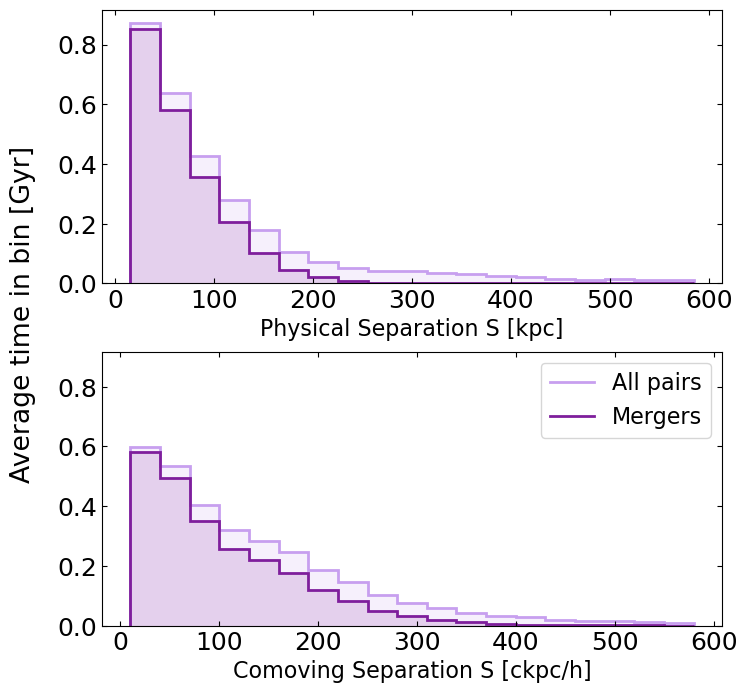

In [13]:
fig, ax = plt.subplots(2, 1, figsize=(8,8), sharey=True, sharex=False, 
                       gridspec_kw={'width_ratios': [1], 
                                    'height_ratios':[1,1],
                                    'wspace': 0.10,
                                    "hspace":0.25})

    # define bins for histograms
bins_kpc = np.arange(15,600,30)
bins_ckpc = np.arange(10,600,30)

colors = ["xkcd:light pink","xkcd:lavender","xkcd:purple"]
colors = ["xkcd:lavender","xkcd:purple"]
label = ["All pairs","Mergers"]
j=0

for mask in [nonmerge_mask,full_mask]:
    
        # calculate number of mergers and elapsed time - used for weights 
    elapsed = elapsed_matrix[mask]
    num_mergers = np.count_nonzero(merger_array)
    num_nonmergers = len(nonmerge_mask)-1

   # create histograms
    vals_kpc, edges_kpc = np.histogram(sep_matrix_kpc[mask],bins=bins_kpc,weights=elapsed/num_mergers)
    vals_ckpc, edges_ckpc = np.histogram(sep_matrix_ckpcperh[mask],bins=bins_ckpc,weights=elapsed/num_mergers)

    ###                      ###
    # physical separation plot #
    ###                      ###
    ax[0].stairs(vals_kpc,edges_kpc,color=colors[j],lw=2,fill=True,alpha=0.15)
    ax[0].stairs(vals_kpc,edges_kpc,color=colors[j],lw=2,label=label[j])

    ###                      ###
    # comoving separation plot #
    ###                      ###
    ax[1].stairs(vals_ckpc,edges_ckpc,lw=2,color=colors[j],fill=True,alpha=0.15)
    ax[1].stairs(vals_ckpc,edges_ckpc,color=colors[j],lw=2,label=label[j])
    j+=1

# for i,label in enumerate(["Physical","Comoving"]):
#     x0,x1 = ax[i].get_xlim()
#     y0,y1 = ax[i].get_ylim()
#     locx = 0.5*(x1-x0) + x0
#     locy = 0.80*(y1-y0) + y0
#     ax[i].text(locx,locy,label,ha="center")
    
ax[1].legend()
ax[0].set_xlabel("Physical Separation S [kpc]")
ax[1].set_xlabel("Comoving Separation S [ckpc/h]")
fig.supylabel("Average time in bin [Gyr]",x=0.01)
plt.show()

Snapshot (From z=0 to z=20, from snap 99 to 0)

In [14]:
snap_dict["Lookback Time"][::-1]

array([1.77635684e-15, 1.36488333e-01, 3.40074606e-01, 4.75021330e-01,
       6.76252517e-01, 8.09600867e-01, 1.00839230e+00, 1.14008622e+00,
       1.33635449e+00, 1.46633890e+00, 1.66000232e+00, 1.85206448e+00,
       1.97920241e+00, 2.16853359e+00, 2.29382551e+00, 2.48035043e+00,
       2.66515681e+00, 2.78739386e+00, 2.96928046e+00, 3.14938326e+00,
       3.26844946e+00, 3.50414693e+00, 3.62076570e+00, 3.79413961e+00,
       3.96563147e+00, 4.07890482e+00, 4.24722031e+00, 4.41360808e+00,
       4.57805312e+00, 4.74054166e+00, 4.90106113e+00, 5.05960020e+00,
       5.21614881e+00, 5.37069816e+00, 5.52324072e+00, 5.72349850e+00,
       5.87133643e+00, 6.01715166e+00, 6.16094216e+00, 6.34951208e+00,
       6.48857728e+00, 6.67085180e+00, 6.80520283e+00, 6.98120678e+00,
       7.11086956e+00, 7.28064697e+00, 7.44689310e+00, 7.60963140e+00,
       7.72939890e+00, 7.92469312e+00, 8.07707784e+00, 8.22607695e+00,
       8.37172731e+00, 8.51406791e+00, 8.68740199e+00, 8.82244839e+00,
      

In [15]:
elapsed_array = np.diff(snap_dict["Lookback Time"][::-1])
elapsed_array

array([0.13648833, 0.20358627, 0.13494672, 0.20123119, 0.13334835,
       0.19879143, 0.13169392, 0.19626828, 0.12998441, 0.19366342,
       0.19206215, 0.12713793, 0.18933118, 0.12529192, 0.18652493,
       0.18480638, 0.12223704, 0.18188661, 0.1801028 , 0.1190662 ,
       0.23569747, 0.11661877, 0.17337391, 0.17149186, 0.11327335,
       0.16831549, 0.16638777, 0.16444505, 0.16248854, 0.16051947,
       0.15853907, 0.15654861, 0.15454935, 0.15254256, 0.20025778,
       0.14783793, 0.14581523, 0.1437905 , 0.18856991, 0.1390652 ,
       0.18227452, 0.13435103, 0.17600395, 0.12966278, 0.16977741,
       0.16624613, 0.16273829, 0.11976751, 0.19529422, 0.15238472,
       0.14899911, 0.14565035, 0.1423406 , 0.17333408, 0.1350464 ,
       0.16435557, 0.15949336, 0.15472505, 0.20878849, 0.08674488,
       0.16868103, 0.1357744 , 0.15733133, 0.1513932 , 0.14563402,
       0.16286559, 0.15555149, 0.14851608, 0.14175526, 0.15407306,
       0.14598782, 0.15504758, 0.14582497, 0.09234402, 0.20121

In [16]:
np.quantile(elapsed[sepmask],np.array([0.25,0.75]))

array([0.1437905 , 0.16868103])

In [17]:
sepmask = (10 < sep_matrix_ckpcperh[mask])&(sep_matrix_ckpcperh[mask]<20)
print(np.median(elapsed[sepmask]))
print(f"+{} -{}")

SyntaxError: f-string: empty expression not allowed (2967733816.py, line 3)

In [18]:
bin_comov = np.arange(10,400,10)
medians, lowers, uppers = [], [], []
for i in range(len(bin_comov)-1):
    lower = bin_comov[i]
    upper = bin_comov[i+1]
#     print(i, lower, upper)
    sepmask = (lower < sep_matrix_ckpcperh[mask]) & (sep_matrix_ckpcperh[mask] < upper)
    medians.append(np.median(elapsed[sepmask]))
    lowers.append(np.quantile(elapsed[sepmask],np.array([0.25])))
    uppers.append(np.quantile(elapsed[sepmask],np.array([0.75])))
    
    

In [19]:
len(sep_matrix_ckpcperh[0])

99

In [20]:
unit = 4
maaa = (10 < sep_matrix_ckpcperh[unit]) & (sep_matrix_ckpcperh[unit] < 50) 
np.sum(elapsed_array[maaa])


0.5006382651892185

In [21]:
sep1d = sep_matrix_ckpcperh[mask]
elaps1d = elapsed_matrix[mask]
sepmask1d = (sep1d > 10) & (sep1d < 50)
elaps1d

array([0.1390652 , 0.18227452, 0.13435103, ..., 0.1513932 , 0.14563402,
       0.16286559])

In [22]:
masked_seps = np.where(mask,sep_matrix_ckpcperh,0)
masked_testt = np.where(mask,np.where(sep_matrix_ckpcperh>10,np.where(sep_matrix_ckpcperh < 20,elapsed_array,0),0),0)

# super hard to parse, but very fast^ 
# essentially returns an array of the same shape as seps, with the value of elapsed time where:
    # the mask is true 
    # the sep is larger than the lower 
    # the sep is less than the upper


In [23]:
np.sum(masked_testt,axis=1)[4]

0.3003804861879509

In [24]:
np.quantile(np.sum(masked_testt,axis=1),np.array([0.25]))

array([0.])

In [25]:
len(np.sum(masked_testt,axis=1))
summm = np.sum(masked_testt,axis=1)

In [26]:
np.median(summm)

0.1547250548161898

In [27]:
np.median(summm)

0.1547250548161898

In [28]:
lower = 100
upper = 120
daniel = np.sum(np.where(mask,np.where(sep_matrix_ckpcperh>=lower,np.where(sep_matrix_ckpcperh < upper,elapsed_array,0),0),0),axis=1)
print(np.median(daniel))
print(np.median(daniel[np.nonzero(daniel)]))


0.14851607796818733
0.15949335728844005


In [29]:
np.nonzero

<function numpy.nonzero(a)>

(array([453.,   0.,  24., 152., 426.,  54.,   0.,  20.,  74.,  13.,   2.,
          2.,  26.,   8.,   2.,   4.,  20.,   5.,   1.,   1.,   9.,   8.,
          1.,   0.,   1.,   5.,   3.,   1.,   1.,   4.,   1.,   1.,   0.,
          2.,   0.,   1.,   0.,   2.,   1.,   2.]),
 array([0.        , 0.03640976, 0.07281951, 0.10922927, 0.14563902,
        0.18204878, 0.21845853, 0.25486829, 0.29127804, 0.3276878 ,
        0.36409756, 0.40050731, 0.43691707, 0.47332682, 0.50973658,
        0.54614633, 0.58255609, 0.61896584, 0.6553756 , 0.69178536,
        0.72819511, 0.76460487, 0.80101462, 0.83742438, 0.87383413,
        0.91024389, 0.94665364, 0.9830634 , 1.01947315, 1.05588291,
        1.09229267, 1.12870242, 1.16511218, 1.20152193, 1.23793169,
        1.27434144, 1.3107512 , 1.34716095, 1.38357071, 1.41998047,
        1.45639022]),
 <BarContainer object of 40 artists>)

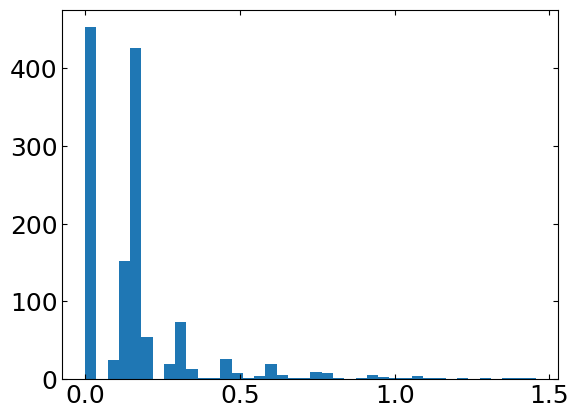

In [30]:
plt.hist(np.sum(np.where(mask,np.where(sep_matrix_ckpcperh>=lower,np.where(sep_matrix_ckpcperh < upper,elapsed_array,0),0),0),axis=1),bins=40)



In [31]:
lowers

[array([0.1437905]),
 array([0.1390652]),
 array([0.1423406]),
 array([0.1423406]),
 array([0.1423406]),
 array([0.1423406]),
 array([0.14563402]),
 array([0.14563402]),
 array([0.1437905]),
 array([0.14563402]),
 array([0.14563402]),
 array([0.14563402]),
 array([0.14563402]),
 array([0.14563402]),
 array([0.14563402]),
 array([0.14565035]),
 array([0.14471226]),
 array([0.1423406]),
 array([0.14175526]),
 array([0.14175526]),
 array([0.1382425]),
 array([0.14471226]),
 array([0.1357744]),
 array([0.1357744]),
 array([0.14563402]),
 array([0.14175526]),
 array([0.1423406]),
 array([0.14190159]),
 array([0.14586568]),
 array([0.09919989]),
 array([0.14563402]),
 array([0.1357744]),
 array([0.14175526]),
 array([0.13726962]),
 array([0.1350464]),
 array([0.1357744]),
 array([0.1357744]),
 array([0.1357744])]

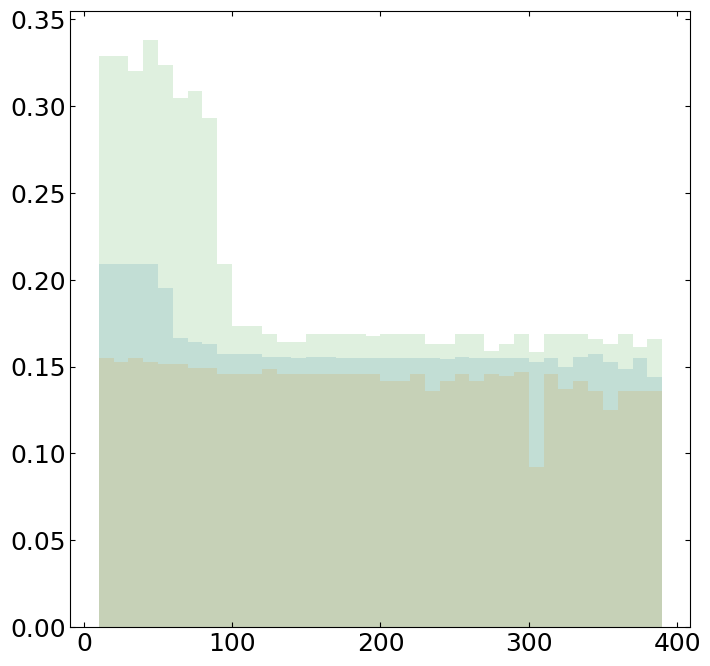

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(8,8), sharey=True, sharex=False, 
                       gridspec_kw={'width_ratios': [1], 
                                    'height_ratios':[1],
                                    'wspace': 0.10,
                                    "hspace":0.25})

bin_comov = np.arange(10,400,10)
medians, lowers, uppers = [], [], []
for i in range(len(bin_comov)-1):
    lower = bin_comov[i]
    upper = bin_comov[i+1]
#     print(i, lower, upper)
    sepmask = (lower < sep_matrix_ckpcperh[mask]) & (sep_matrix_ckpcperh[mask] < upper)
    
    times_at_sep = np.where(mask,np.where(sep_matrix_ckpcperh>=lower,np.where(sep_matrix_ckpcperh < upper,elapsed_array,0),0),0)

    time_at_sep_total = np.sum(times_at_sep,axis=1)
    
    # need to drop 0s from 
    nonzero_times = time_at_sep_total[np.nonzero(time_at_sep_total)]
    
    medians.append(np.median(nonzero_times))
    lowers.append(np.quantile(nonzero_times,np.array([0.25]))[0])
    uppers.append(np.quantile(nonzero_times,np.array([0.75]))[0])
    
ax.stairs(medians, edges=bin_comov, lw=2, fill=True, alpha=0.15)
ax.stairs(lowers, edges=bin_comov, lw=2, fill=True, alpha=0.15)
ax.stairs(uppers, edges=bin_comov, lw=2, fill=True, alpha=0.15)

# colors = ["xkcd:light pink","xkcd:lavender","xkcd:purple"]
# colors = ["xkcd:lavender","xkcd:purple"]
# label = ["All pairs","Mergers"]
# j=0

# for mask in [nonmerge_mask,full_mask]:
    
#         # calculate number of mergers and elapsed time - used for weights 
#     elapsed = elapsed_matrix[mask]
#     num_mergers = np.count_nonzero(merger_array)
#     num_nonmergers = len(nonmerge_mask)-1

#    # create histograms
#     vals_kpc, edges_kpc = np.histogram(sep_matrix_kpc[mask],bins=bins_kpc,weights=elapsed/num_mergers)
#     vals_ckpc, edges_ckpc = np.histogram(sep_matrix_ckpcperh[mask],bins=bins_ckpc,weights=elapsed/num_mergers)

#     ###                      ###
#     # physical separation plot #
#     ###                      ###
#     ax[0].stairs(vals_kpc,edges_kpc,color=colors[j],lw=2,fill=True,alpha=0.15)
#     ax[0].stairs(vals_kpc,edges_kpc,color=colors[j],lw=2,label=label[j])

#     ###                      ###
#     # comoving separation plot #
#     ###                      ###
#     ax[1].stairs(vals_ckpc,edges_ckpc,lw=2,color=colors[j],fill=True,alpha=0.15)
#     ax[1].stairs(vals_ckpc,edges_ckpc,color=colors[j],lw=2,label=label[j])
#     j+=1

# for i,label in enumerate(["Physical","Comoving"]):
#     x0,x1 = ax[i].get_xlim()
#     y0,y1 = ax[i].get_ylim()
#     locx = 0.5*(x1-x0) + x0
#     locy = 0.80*(y1-y0) + y0
#     ax[i].text(locx,locy,label,ha="center")
    
# ax[1].legend()
# ax[0].set_xlabel("Physical Separation S [kpc]")
# ax[1].set_xlabel("Comoving Separation S [ckpc/h]")
# fig.supylabel("Average time in bin [Gyr]",x=0.01)
plt.show()

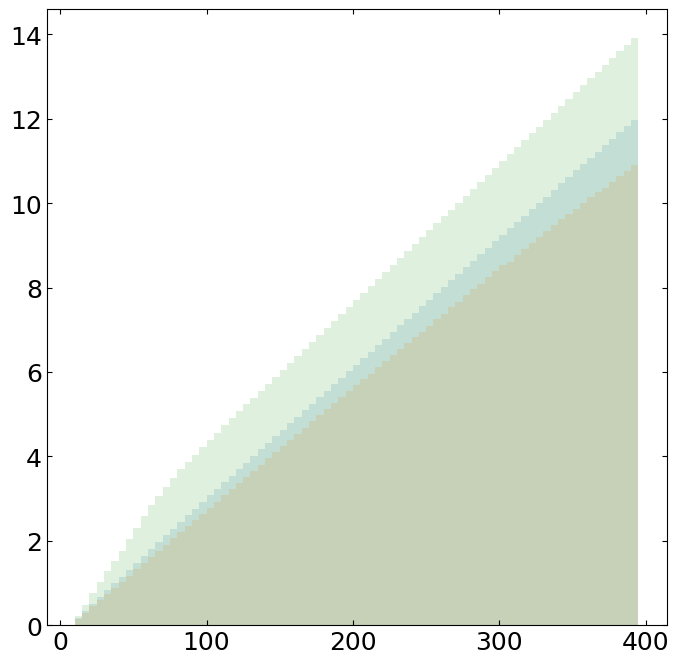

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(8,8), sharey=True, sharex=False, 
                       gridspec_kw={'width_ratios': [1], 
                                    'height_ratios':[1],
                                    'wspace': 0.10,
                                    "hspace":0.25})

bin_comov = np.arange(10,400,5)
medians, lowers, uppers = [], [], []
for i in range(len(bin_comov)-1):
    lower = bin_comov[i]
    upper = bin_comov[i+1]
#     print(i, lower, upper)
    sepmask = (lower < sep_matrix_ckpcperh[mask]) & (sep_matrix_ckpcperh[mask] < upper)
    
    times_at_sep = np.where(mask,np.where(sep_matrix_ckpcperh>=lower,np.where(sep_matrix_ckpcperh < upper,elapsed_array,0),0),0)

    time_at_sep_total = np.sum(times_at_sep,axis=1)
    
    # need to drop 0s from 
    nonzero_times = time_at_sep_total[np.nonzero(time_at_sep_total)]
    
    medians.append(np.median(nonzero_times))
    lowers.append(np.quantile(nonzero_times,np.array([0.25]))[0])
    uppers.append(np.quantile(nonzero_times,np.array([0.75]))[0])
    
ax.stairs(np.cumsum(medians), edges=bin_comov, lw=2, fill=True, alpha=0.15)
ax.stairs(np.cumsum(lowers), edges=bin_comov, lw=2, fill=True, alpha=0.15)

ax.stairs(np.cumsum(uppers), edges=bin_comov, lw=2, fill=True, alpha=0.15)


# ax.stairs(, edges=bin_comov, lw=2, fill=True, alpha=0.15)


plt.show()

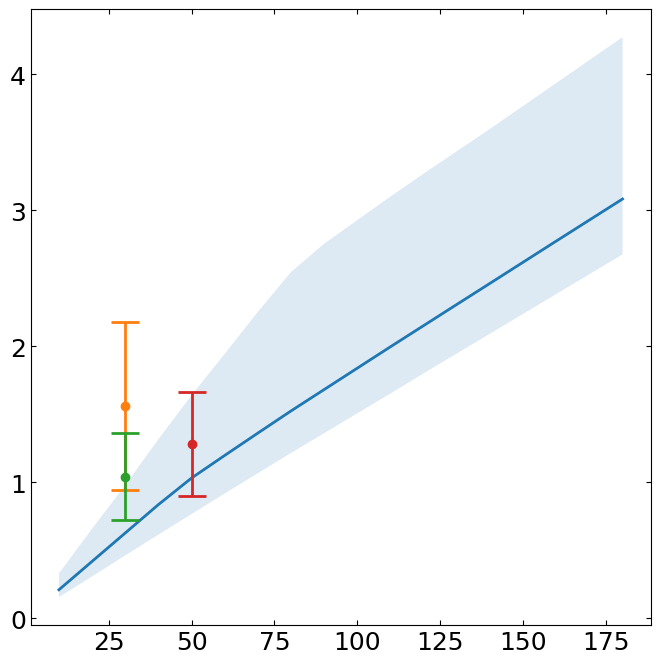

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(8,8), sharey=True, sharex=False, 
                       gridspec_kw={'width_ratios': [1], 
                                    'height_ratios':[1],
                                    'wspace': 0.10,
                                    "hspace":0.25})

bin_comov = np.arange(10,200,10)
medians, lowers, uppers = [], [], []
for i in range(len(bin_comov)-1):
    lower = bin_comov[i]
    upper = bin_comov[i+1]
#     print(i, lower, upper)
    sepmask = (lower < sep_matrix_ckpcperh[mask]) & (sep_matrix_ckpcperh[mask] < upper)
    
    times_at_sep = np.where(mask,np.where(sep_matrix_ckpcperh>=lower,np.where(sep_matrix_ckpcperh < upper,elapsed_array,0),0),0)

    time_at_sep_total = np.sum(times_at_sep,axis=1)
    
    # need to drop 0s from 
    nonzero_times = time_at_sep_total[np.nonzero(time_at_sep_total)]
    
    medians.append(np.median(nonzero_times))
    lowers.append(np.quantile(nonzero_times,np.array([0.25]))[0])
    uppers.append(np.quantile(nonzero_times,np.array([0.75]))[0])
    
lotz_sep = np.array([30,30,50])
lotz_times = np.array([0.78,0.52,0.64])
lotz_error = np.array([0.31,0.16,0.19])
# ax.stairs(np.cumsum(medians), edges=bin_comov, lw=2, alpha=0.15)
ax.plot(bin_comov[:-1],np.cumsum(medians), lw=2)
ax.fill_between(bin_comov[:-1],np.cumsum(lowers),np.cumsum(uppers),lw=2,  alpha=0.15)
for i in range(3):
    ax.errorbar(lotz_sep[i],lotz_times[i]*2,lotz_error[i]*2,lw=2,fmt="o",capsize=10,capthick=2)
# ax.stairs(, edges=bin_comov, lw=2, fill=True, alpha=0.15)
# ax.set_xlim()

plt.show()

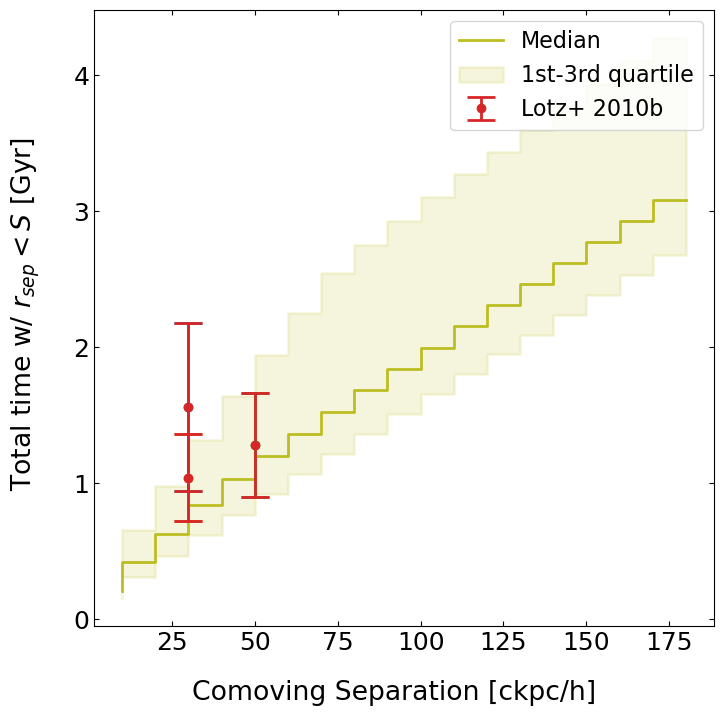

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(8,8), sharey=True, sharex=False, 
                       gridspec_kw={'width_ratios': [1], 
                                    'height_ratios':[1],
                                    'wspace': 0.10,
                                    "hspace":0.25})

bin_comov = np.arange(10,200,10)
medians, lowers, uppers = [], [], []
for i in range(len(bin_comov)-1):
    lower = bin_comov[i]
    upper = bin_comov[i+1]
#     print(i, lower, upper)
    sepmask = (lower < sep_matrix_ckpcperh[mask]) & (sep_matrix_ckpcperh[mask] < upper)
    
    times_at_sep = np.where(mask,np.where(sep_matrix_ckpcperh>=lower,np.where(sep_matrix_ckpcperh < upper,elapsed_array,0),0),0)

    time_at_sep_total = np.sum(times_at_sep,axis=1)
    
    # need to drop 0s from 
    nonzero_times = time_at_sep_total[np.nonzero(time_at_sep_total)]
    
    medians.append(np.median(nonzero_times))
    lowers.append(np.quantile(nonzero_times,np.array([0.25]))[0])
    uppers.append(np.quantile(nonzero_times,np.array([0.75]))[0])
    
lotz_sep = np.array([30,30,50])
lotz_times = np.array([0.78,0.52,0.64])
lotz_error = np.array([0.31,0.16,0.19])
# ax.stairs(np.cumsum(medians), edges=bin_comov, lw=2, alpha=0.15)
ax.plot(bin_comov[:-1],np.cumsum(medians), lw=2,ds='steps',color="tab:olive",label="Median")
ax.fill_between(bin_comov[:-1],np.cumsum(lowers),np.cumsum(uppers),lw=2,color="tab:olive",  alpha=0.15,step='pre',label="1st-3rd quartile")
for i in range(3):
    ax.errorbar(lotz_sep[i],lotz_times[i]*2,lotz_error[i]*2,lw=2,fmt="o",capsize=10,capthick=2)

ax.errorbar(lotz_sep,lotz_times*2,lotz_error*2,lw=2,fmt="o",capsize=10,capthick=2,label="Lotz+ 2010b")
# ax.stairs(, edges=bin_comov, lw=2, fill=True, alpha=0.15)
ax.legend()
fig.supylabel(r"Total time w/ $r_{sep}<S$ [Gyr]")
fig.supxlabel("Comoving Separation [ckpc/h]")
plt.show()

data from lotz real separation plot: 

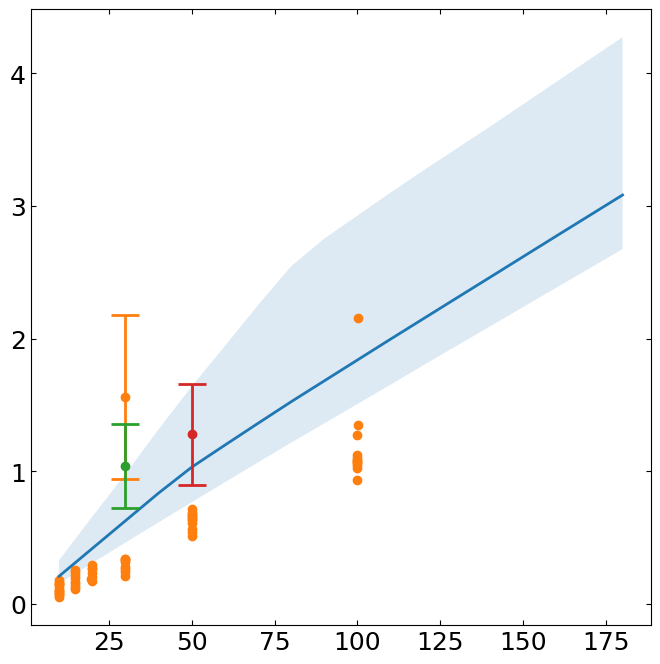

In [200]:
lotz_real = pd.read_csv("/xdisk/gbesla/katiechambe/orbs/data/lotz_real.csv",names=np.array(["Separation","Time"]))
fig, ax = plt.subplots(1, 1, figsize=(8,8), sharey=True, sharex=False, 
                       gridspec_kw={'width_ratios': [1], 
                                    'height_ratios':[1],
                                    'wspace': 0.10,
                                    "hspace":0.25})

bin_comov = np.arange(10,200,10)
medians, lowers, uppers = [], [], []
for i in range(len(bin_comov)-1):
    lower = bin_comov[i]
    upper = bin_comov[i+1]
#     print(i, lower, upper)
    sepmask = (lower < sep_matrix_ckpcperh[mask]) & (sep_matrix_ckpcperh[mask] < upper)
    
    times_at_sep = np.where(mask,np.where(sep_matrix_ckpcperh>=lower,np.where(sep_matrix_ckpcperh < upper,elapsed_array,0),0),0)

    time_at_sep_total = np.sum(times_at_sep,axis=1)
    
    # need to drop 0s from 
    nonzero_times = time_at_sep_total[np.nonzero(time_at_sep_total)]
    
    medians.append(np.median(nonzero_times))
    lowers.append(np.quantile(nonzero_times,np.array([0.25]))[0])
    uppers.append(np.quantile(nonzero_times,np.array([0.75]))[0])
    
lotz_sep = np.array([30,30,50])
lotz_times = np.array([0.78,0.52,0.64])
lotz_error = np.array([0.31,0.16,0.19])
# ax.stairs(np.cumsum(medians), edges=bin_comov, lw=2, alpha=0.15)
ax.plot(bin_comov[:-1],np.cumsum(medians), lw=2)
ax.fill_between(bin_comov[:-1],np.cumsum(lowers),np.cumsum(uppers),lw=2,  alpha=0.15)
for i in range(3):
    ax.errorbar(lotz_sep[i],lotz_times[i]*2,lotz_error[i]*2,lw=2,fmt="o",capsize=10,capthick=2)
    
ax.scatter(lotz_real['Separation'],lotz_real['Time'])
# ax.stairs(, edges=bin_comov, lw=2, fill=True, alpha=0.15)
# ax.set_xlim()

plt.show()

# details: 

when calculating the median, does not consider pairs that spend no time in the bin. so if only 1 of 1000 halos spends time in bin 10-20kpc, the median is only of the time that single halo spent in the bin

In [40]:
elapsed

array([0.1390652 , 0.18227452, 0.13435103, ..., 0.1513932 , 0.14563402,
       0.16286559])

# Cumulative time spent

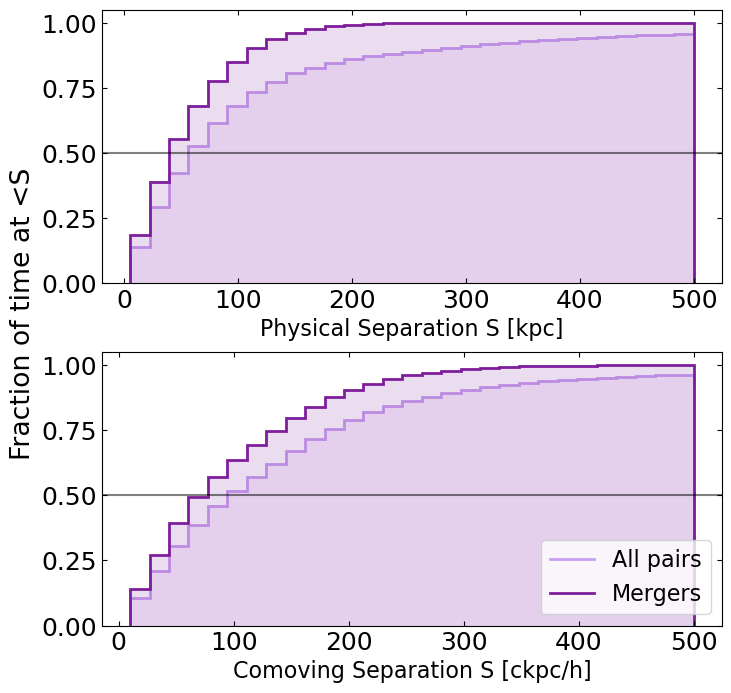

In [82]:
fig, ax = plt.subplots(2, 1, figsize=(8,8), sharey=True, sharex=False, 
                       gridspec_kw={'width_ratios': [1], 
                                    'height_ratios':[1,1],
                                    'wspace': 0.10,
                                    "hspace":0.25})

    # define bins for histograms
bins_kpc = np.linspace(5,500,30)
bins_ckpc = np.linspace(10,500,30)

colors = ["xkcd:light pink","xkcd:lavender","xkcd:purple"]
colors = ["xkcd:lavender","xkcd:purple"]
label = ["All pairs","Mergers"]
j=0

for mask in [nonmerge_mask,full_mask]:
    
        # calculate number of mergers and elapsed time - used for weights 
    elapsed = elapsed_matrix[mask]
    num_mergers = np.count_nonzero(merger_array)
    num_nonmergers = len(nonmerge_mask)-1
    total_time = np.sum(elapsed)

   # create histograms
    vals_kpc, edges_kpc = np.histogram(sep_matrix_kpc[mask],bins=bins_kpc,weights=elapsed/total_time)
    vals_ckpc, edges_ckpc = np.histogram(sep_matrix_ckpcperh[mask],bins=bins_ckpc,weights=elapsed/total_time)

    ###                      ###
    # physical separation plot #
    ###                      ###
    ax[0].stairs(np.cumsum(vals_kpc),edges_kpc,color=colors[j],lw=2,fill=True,alpha=0.15)
    ax[0].stairs(np.cumsum(vals_kpc),edges_kpc,color=colors[j],lw=2,label=label[j])

    ###                      ###
    # comoving separation plot #
    ###                      ###
    ax[1].stairs(np.cumsum(vals_ckpc),edges_ckpc,lw=2,color=colors[j],fill=True,alpha=0.15)
    ax[1].stairs(np.cumsum(vals_ckpc),edges_ckpc,color=colors[j],lw=2,label=label[j])
    j+=1

# for i,label in enumerate(["Physical","Comoving"]):
#     x0,x1 = ax[i].get_xlim()
#     y0,y1 = ax[i].get_ylim()
#     locx = 0.5*(x1-x0) + x0
#     locy = 0.80*(y1-y0) + y0
#     ax[i].text(locx,locy,label,ha="center")

ax[0].axhline(0.5,color='black',alpha=0.5)
ax[1].axhline(0.5,color='black',alpha=0.5)
ax[1].legend(loc="lower right")
ax[0].set_xlabel("Physical Separation S [kpc]")
ax[1].set_xlabel("Comoving Separation S [ckpc/h]")
fig.supylabel("Fraction of time at <S",x=0.01)
plt.show()

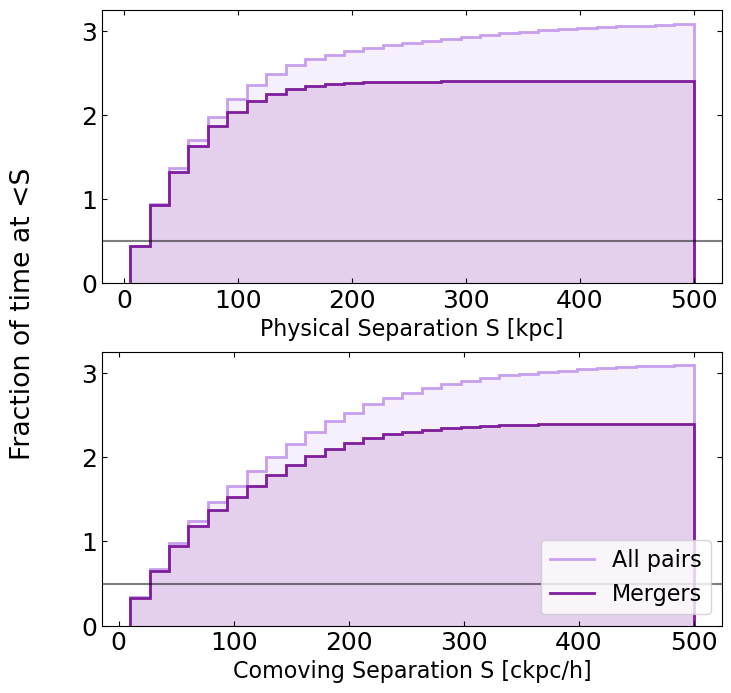

In [21]:
fig, ax = plt.subplots(2, 1, figsize=(8,8), sharey=True, sharex=False, 
                       gridspec_kw={'width_ratios': [1], 
                                    'height_ratios':[1,1],
                                    'wspace': 0.10,
                                    "hspace":0.25})

    # define bins for histograms
bins_kpc = np.linspace(5,500,30)
bins_ckpc = np.linspace(10,500,30)

colors = ["xkcd:light pink","xkcd:lavender","xkcd:purple"]
colors = ["xkcd:lavender","xkcd:purple"]
label = ["All pairs","Mergers"]
j=0

for mask in [nonmerge_mask,full_mask]:
    
        # calculate number of mergers and elapsed time - used for weights 
    elapsed = elapsed_matrix[mask]
    num_mergers = np.count_nonzero(merger_array)
    num_nonmergers = len(nonmerge_mask)-1
    total_time = np.sum(elapsed)

   # create histograms
    vals_kpc, edges_kpc = np.histogram(sep_matrix_kpc[mask],bins=bins_kpc,weights=elapsed/num_mergers)
    vals_ckpc, edges_ckpc = np.histogram(sep_matrix_ckpcperh[mask],bins=bins_ckpc,weights=elapsed/num_mergers)

    ###                      ###
    # physical separation plot #
    ###                      ###
    ax[0].stairs(np.cumsum(vals_kpc),edges_kpc,color=colors[j],lw=2,fill=True,alpha=0.15)
    ax[0].stairs(np.cumsum(vals_kpc),edges_kpc,color=colors[j],lw=2,label=label[j])

    ###                      ###
    # comoving separation plot #
    ###                      ###
    ax[1].stairs(np.cumsum(vals_ckpc),edges_ckpc,lw=2,color=colors[j],fill=True,alpha=0.15)
    ax[1].stairs(np.cumsum(vals_ckpc),edges_ckpc,color=colors[j],lw=2,label=label[j])
    j+=1

# for i,label in enumerate(["Physical","Comoving"]):
#     x0,x1 = ax[i].get_xlim()
#     y0,y1 = ax[i].get_ylim()
#     locx = 0.5*(x1-x0) + x0
#     locy = 0.80*(y1-y0) + y0
#     ax[i].text(locx,locy,label,ha="center")

ax[0].axhline(0.5,color='black',alpha=0.5)
ax[1].axhline(0.5,color='black',alpha=0.5)
ax[1].legend(loc="lower right")
ax[0].set_xlabel("Physical Separation S [kpc]")
ax[1].set_xlabel("Comoving Separation S [ckpc/h]")
fig.supylabel("Fraction of time at <S",x=0.01)
plt.show()

In [ ]:
np.cumsum

# Getting in terms of z?

In [ ]:
inz = (sep_matrix_ckpcperh[mask]/sep_matrix_kpc[mask]/little_h)-1

In [59]:
inz

array([1.67611041, 1.70010635, 1.73263618, ..., 2.74357057, 2.82268925,
       2.90408954])

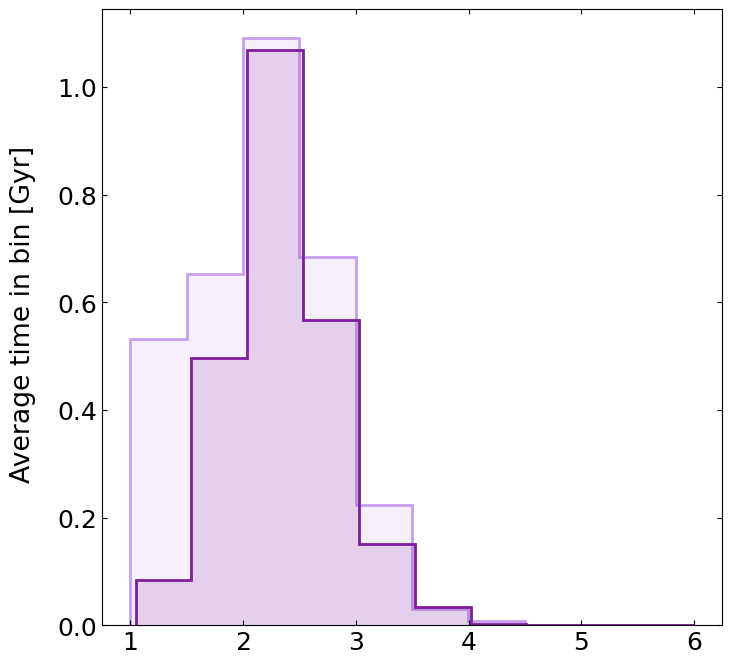

In [62]:
fig, ax = plt.subplots(1, 1, figsize=(8,8), sharey=True, sharex=False, 
                       gridspec_kw={'width_ratios': [1], 
                                    'height_ratios':[1],
                                    'wspace': 0.10,
                                    "hspace":0.25})

    # define bins for histograms
# bins_kpc = np.arange(0,600,30)
# bins_ckpc = np.arange(0,600,30)

colors = ["xkcd:light pink","xkcd:lavender","xkcd:purple"]
colors = ["xkcd:lavender","xkcd:purple"]
label = ["All pairs","Mergers"]
j=0

for mask in [nonmerge_mask,full_mask]:
    
    inz = sep_matrix_ckpcperh[mask]/sep_matrix_kpc[mask]/little_h
    
        # calculate number of mergers and elapsed time - used for weights 
    elapsed = elapsed_matrix[mask]
    num_mergers = np.count_nonzero(merger_array)
    num_nonmergers = len(nonmerge_mask)-1

   # create histograms
    vals_inz, edges_inz = np.histogram(inz,weights=elapsed/num_mergers)
#     vals_ckpc, edges_ckpc = np.histogram(sep_matrix_ckpcperh[mask],bins=bins_ckpc,weights=elapsed/num_mergers)

    ###                      ###
    # physical separation plot #
    ###                      ###
    ax.stairs(vals_inz,edges_inz,color=colors[j],lw=2,fill=True,alpha=0.15)
    ax.stairs(vals_inz,edges_inz,color=colors[j],lw=2,label=label[j])

    ###                      ###
    # comoving separation plot #
    ###                      ###
#     ax.stairs(vals_ckpc,edges_ckpc,lw=2,color=colors[j],fill=True,alpha=0.15)
#     ax.stairs(vals_ckpc,edges_ckpc,color=colors[j],lw=2,label=label[j])
    j+=1

# for i,label in enumerate(["Physical","Comoving"]):
#     x0,x1 = ax[i].get_xlim()
#     y0,y1 = ax[i].get_ylim()
#     locx = 0.5*(x1-x0) + x0
#     locy = 0.80*(y1-y0) + y0
#     ax[i].text(locx,locy,label,ha="center")
    
# ax[1].legend()
# ax[0].set_xlabel("Physical Separation S [kpc]")
# ax[1].set_xlabel("Comoving Separation S [ckpc/h]")
fig.supylabel("Average time in bin [Gyr]",x=0.01)
plt.show()

In [46]:
snap = 40
orb = orbit_dict[str(snap)]
sep_matrix_kpc = orb["Separations"]
little_h  = 0.6774

    # get comoving separations
scales = snap_dict['Scale'][::-1][:-1] # gives scale in same order as orbit data
scale_matrix = np.tile(scales,(len(sep_matrix_kpc),1))
sep_matrix_ckpcperh = sep_matrix_kpc/scale_matrix*little_h

inz = (sep_matrix_ckpcperh/little_h/sep_matrix_kpc)-1


    # get elapsed time (positive)
elapsed_time = np.diff(snap_dict["Lookback Time"][::-1]) 
elapsed_matrix = np.tile(elapsed_time,(len(sep_matrix_kpc),1))

    # create mask to filter out nan and zero values from the separation matrix
nan_sep = np.isnan(sep_matrix_kpc)
zero_sep = sep_matrix_kpc == 0
lower_sep = sep_matrix_ckpcperh > 10

# matrix_mask = ~nan_sep&~zero_sep&lower_sep

    # create mask to only select mergers
merger_array = np.array(orb["MergerFlag"],dtype='bool')
merge_mask = np.tile(merger_array,(99,1)).transpose()

    # orbit start when in same FoF group
start_FoF = orb['GroupFlag'] == True

full_mask = start_FoF&~nan_sep&~zero_sep&lower_sep&merge_mask
nonmerge_mask = start_FoF&~nan_sep&~zero_sep&lower_sep



array([6.81081100e-01, 7.24857772e-01, 4.57051414e-01, 2.75169926e-01,
       1.47025984e-01, 6.47556609e-02, 3.09544214e-02, 1.39121959e-02,
       3.01936488e-03, 2.39076172e-03, 2.26845559e-03, 2.54136424e-04,
       2.57699933e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [11]:
xx_ckpc

array([ 46.50017479,  25.11254035,  58.76386133, ..., 122.33914048,
       178.12349448, 235.33853168])

In [9]:
sep_matrix_ckpcperh>10

array([[False, False, False, ..., False, False, False],
       [ True,  True,  True, ...,  True,  True, False],
       [False, False, False, ...,  True,  True, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ...,  True, False, False]])

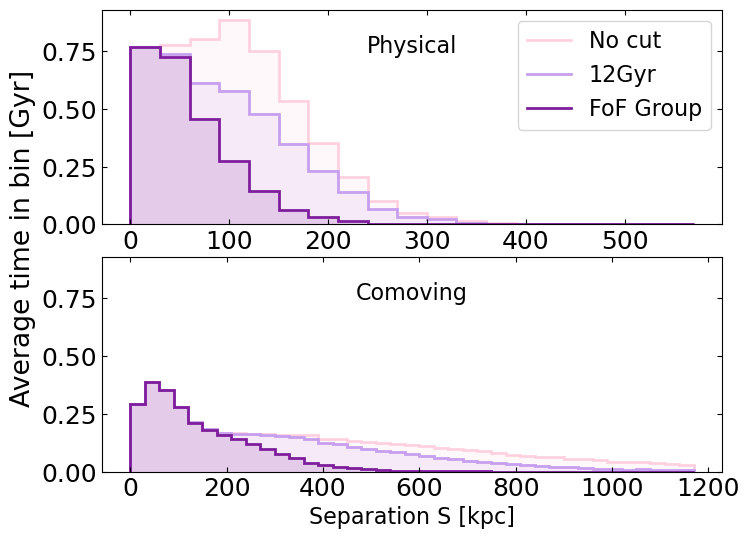

In [5]:
'''
# trying slight modification of the elapsed_time array construction compared to previous plots
# this approximates that a pair stayed at the same separation for the amount of 
# time elapsed since the snapshot before
---
might need to do something else if we are only considering seps > 10kpc? 
'''

fig, ax = plt.subplots(2, 1, figsize=(8,6), sharey=True, sharex=False, 
                       gridspec_kw={'width_ratios': [1], 
                                    'height_ratios':[1,1],
                                    'wspace': 0.10,
                                    "hspace":0.15})

    # get physical separations from snapshot 40
snap = 40
orb = orbit_dict[str(snap)]
sep_matrix_kpc = orb["Separations"]

colors = ["xkcd:light pink","xkcd:lavender","xkcd:purple"]
j = 0    




        # get comoving separations
    scales = snap_dict['Scale'][::-1][:-1] # gives scale in same order as orbit data
    scale_matrix = np.tile(scales,(len(sep_matrix_kpc),1))
    sep_matrix_ckpc = sep_matrix_kpc/scale_matrix

        # get elapsed time (positive)
    elapsed_time = np.diff(snap_dict["Lookback Time"][::-1]) 
    elapsed_matrix = np.tile(elapsed_time,(len(sep_matrix_kpc),1))

        # create mask to filter out nan and zero values from the separation matrix
    nan_sep = np.isnan(sep_matrix_kpc)
    zero_sep = sep_matrix_kpc == 0
    matrix_mask = ~nan_sep&~zero_sep

        # create mask to only select mergers
    merger_array = np.array(orb["MergerFlag"],dtype='bool')
    merge_mask = np.tile(merger_array,(99,1)).transpose()

        # define bins for histograms
    bins_kpc = np.arange(0,600,30)
    bins_ckpc = np.arange(0,1200,30)
    
        # orbit start at LBT of 12Gyr
    start_12gyrmask = (snap_dict["Lookback Time"][::-1][:-1] < 12)    
    start_12gyr = np.tile(start_12gyrmask,(len(sep_matrix_kpc),1))
    
        # orbit start when in same FoF group
    start_FoF = orb['GroupFlag'] == True
    
    start_mask = start_FoF&matrix_mask&merge_mask

        
        #defining 
    xx_kpc = sep_matrix_kpc[start_mask]
    xx_ckpc = sep_matrix_ckpc[start_mask]
    
        # calculate number of mergers and elapsed time - used for weights 
    elapsed = elapsed_matrix[start_mask]
    num_mergers = np.count_nonzero(merger_array)

        # create histograms
    vals_kpc, edges_kpc = np.histogram(xx_kpc,bins=bins_kpc,weights=elapsed/num_mergers)
    vals_ckpc, edges_ckpc = np.histogram(xx_ckpc,bins=bins_ckpc,weights=elapsed/num_mergers)

    ###                      ###
    # physical separation plot #
    ###                      ###
    ax[0].stairs(vals_kpc,edges_kpc,color=colors[j],lw=2,fill=True,alpha=0.15)
    ax[0].stairs(vals_kpc,edges_kpc,color=colors[j],lw=2,label=i)

    ###                      ###
    # comoving separation plot #
    ###                      ###
    ax[1].stairs(vals_ckpc,edges_ckpc,color=colors[j],lw=2,fill=True,alpha=0.15)
    ax[1].stairs(vals_ckpc,edges_ckpc,color=colors[j],lw=2,label=i)

    j += 1

for i,label in enumerate(["Physical","Comoving"]):
    x0,x1 = ax[i].get_xlim()
    y0,y1 = ax[i].get_ylim()
    locx = 0.5*(x1-x0) + x0
    locy = 0.80*(y1-y0) + y0
    ax[i].text(locx,locy,label,ha="center")
    
ax[0].legend()
ax[1].set_xlabel("Separation S [kpc]")
fig.supylabel("Average time in bin [Gyr]",x=0.01)
plt.show()
